# DS3010: Introduction to Machine Learning Lab – Week 9
## **K-Means, GMM, and DBSCAN**
**Name:** Parv Patel  
**Roll No:** 142301041  
**Lab:** Week 9 – Clustering (KMeans, GMM, DBSCAN)

---

### Objective
- Generate two synthetic datasets (blobs and moons).
- Apply K-Means, Gaussian Mixture Model (GMM), and DBSCAN clustering.
- Use Elbow method, BIC/AIC, and k-distance method to select hyperparameters.
- Visualize and compare results, and write concise observations.



## 1. Data Preparation
Generate two datasets:
```python
from sklearn.datasets import make_blobs, make_moons
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)
X2, y2 = make_moons(n_samples=500, noise=0.07, random_state=42)
```
Plot scatter plots for both datasets.

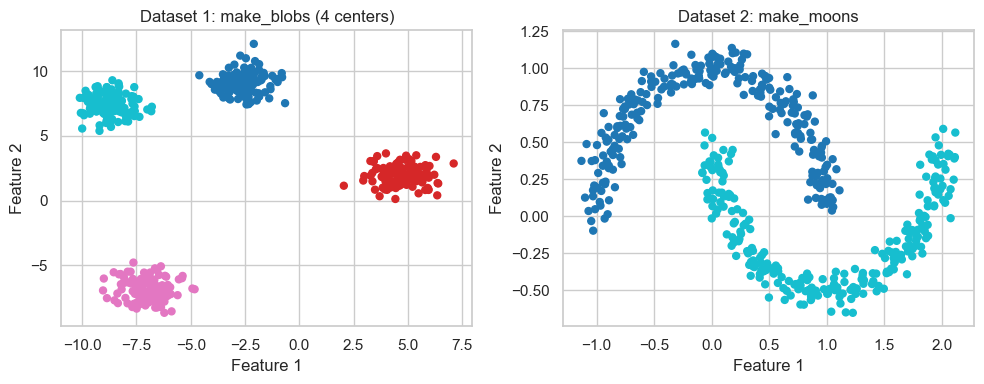

In [1]:
# Imports and dataset generation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
import seaborn as sns
sns.set(style='whitegrid')

# Generate datasets
X1, y1 = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)
X2, y2 = make_moons(n_samples=500, noise=0.07, random_state=42)

# Plot blobs
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap='tab10', s=25)
plt.title('Dataset 1: make_blobs (4 centers)')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')

# Plot moons
plt.subplot(1,2,2)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap='tab10', s=25)
plt.title('Dataset 2: make_moons')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

## 2. Apply Clustering Algorithms
For both datasets we will:
- Run **K-Means**, compute inertia and use the Elbow method.
- Fit **GMM**, select components via BIC/AIC.
- Run **DBSCAN**, use k-distance plot to choose eps.

We'll report and visualize results for each method.

In [2]:
# Common imports for clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import pandas as pd


### 2.1 K-Means: inertia and Elbow method
Compute inertia for k=1..10 and plot the elbow for both datasets.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

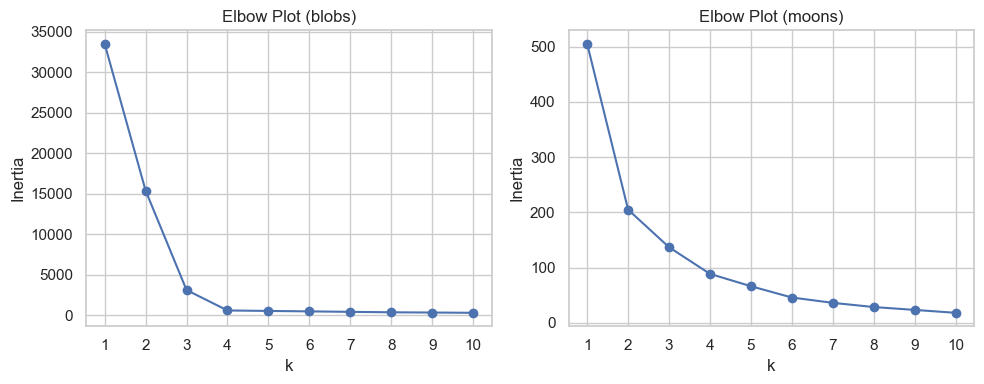

In [3]:
def kmeans_elbow(X, max_k=10, random_state=42):
    inertias = []
    Ks = list(range(1, max_k+1))
    for k in Ks:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        km.fit(X)
        inertias.append(km.inertia_)
    return Ks, inertias

# Dataset 1
Ks1, inertias1 = kmeans_elbow(X1, max_k=10)
# Dataset 2
Ks2, inertias2 = kmeans_elbow(X2, max_k=10)

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Ks1, inertias1, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Plot (blobs)')
plt.xticks(Ks1)

plt.subplot(1,2,2)
plt.plot(Ks2, inertias2, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Plot (moons)')
plt.xticks(Ks2)
plt.tight_layout()
plt.show()

### 2.1.1 Fit KMeans with chosen k and plot clusters + centroids
From the elbow and knowledge of datasets, choose k=4 for blobs and k=2 for moons (KMeans may struggle on moons).

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


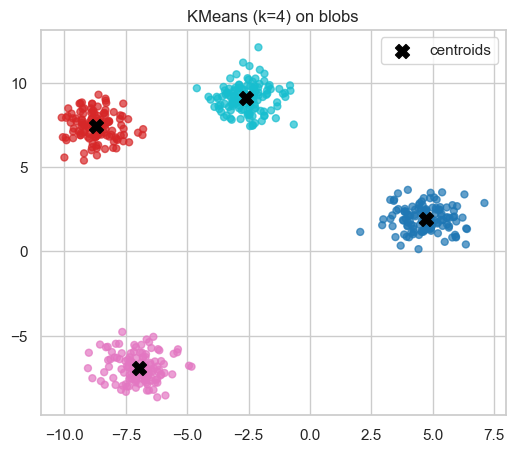

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


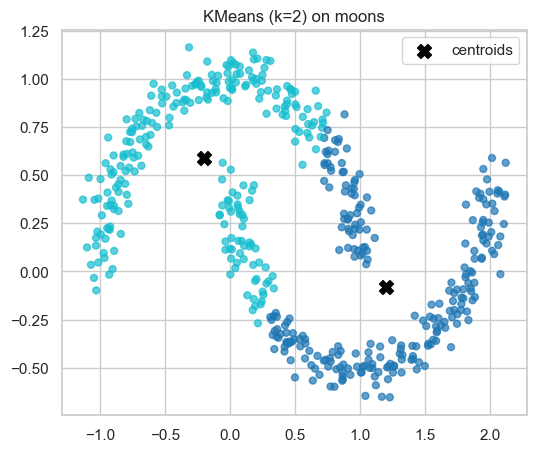

In [4]:
# Fit and plot KMeans for blobs (k=4)
km1 = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X1)
labels_km1 = km1.labels_
centers1 = km1.cluster_centers_

plt.figure(figsize=(6,5))
plt.scatter(X1[:,0], X1[:,1], c=labels_km1, cmap='tab10', s=25, alpha=0.7)
plt.scatter(centers1[:,0], centers1[:,1], c='black', s=100, marker='X', label='centroids')
plt.title('KMeans (k=4) on blobs'); plt.legend(); plt.show()

# Fit and plot KMeans for moons (k=2)
km2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X2)
labels_km2 = km2.labels_
centers2 = km2.cluster_centers_

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=labels_km2, cmap='tab10', s=25, alpha=0.7)
plt.scatter(centers2[:,0], centers2[:,1], c='black', s=100, marker='X', label='centroids')
plt.title('KMeans (k=2) on moons'); plt.legend(); plt.show()

### 2.2 Gaussian Mixture Model (GMM)
Use BIC/AIC to select number of components between 1 and 10 for both datasets.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

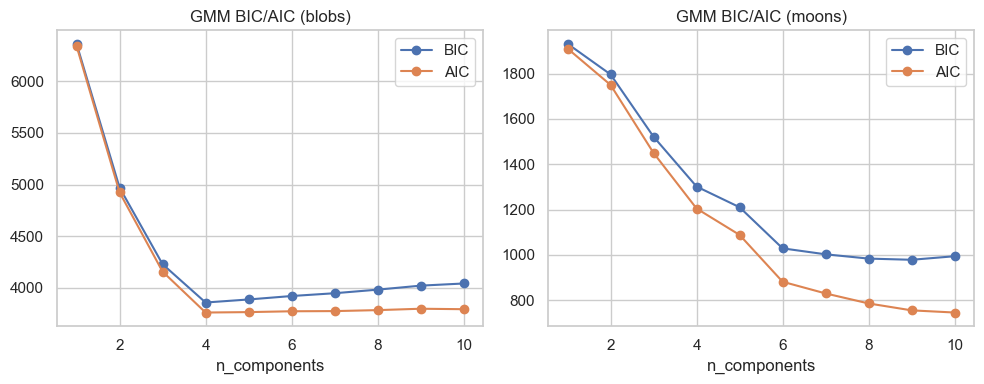

(4, 9)

In [5]:
def gmm_bic_aic(X, max_components=10, random_state=42):
    bics = []
    aics = []
    models = []
    Ks = list(range(1, max_components+1))
    for k in Ks:
        gm = GaussianMixture(n_components=k, covariance_type='full', random_state=random_state, n_init=3)
        gm.fit(X)
        bics.append(gm.bic(X))
        aics.append(gm.aic(X))
        models.append(gm)
    return Ks, bics, aics, models

Ks1, bics1, aics1, gms1 = gmm_bic_aic(X1, max_components=10)
Ks2, bics2, aics2, gms2 = gmm_bic_aic(X2, max_components=10)

# Plot BIC/AIC
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Ks1, bics1, '-o', label='BIC')
plt.plot(Ks1, aics1, '-o', label='AIC')
plt.title('GMM BIC/AIC (blobs)'); plt.xlabel('n_components'); plt.legend()

plt.subplot(1,2,2)
plt.plot(Ks2, bics2, '-o', label='BIC')
plt.plot(Ks2, aics2, '-o', label='AIC')
plt.title('GMM BIC/AIC (moons)'); plt.xlabel('n_components'); plt.legend()
plt.tight_layout()
plt.show()

# choose best by min BIC
best_k1 = Ks1[np.argmin(bics1)]
best_k2 = Ks2[np.argmin(bics2)]
best_k1, best_k2

### 2.2.1 Fit GMM with optimal components and visualize clusters

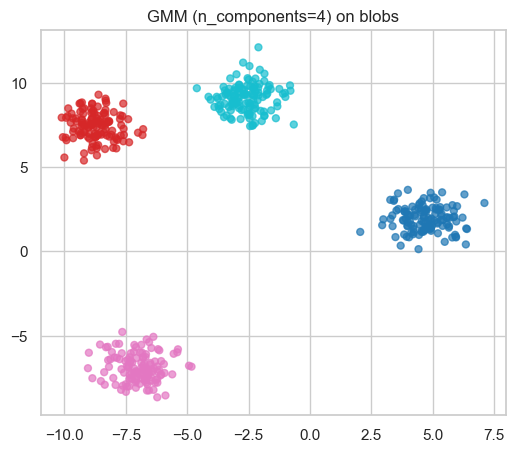

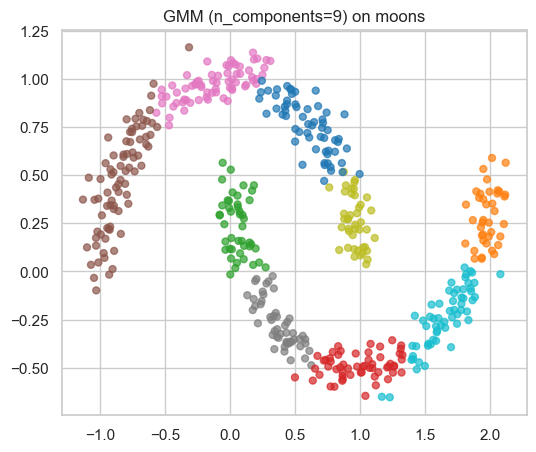

In [6]:
# Best GMM for blobs
best_gm1 = gms1[np.argmin(bics1)]
labels_gm1 = best_gm1.predict(X1)

plt.figure(figsize=(6,5))
plt.scatter(X1[:,0], X1[:,1], c=labels_gm1, cmap='tab10', s=25, alpha=0.7)
plt.title(f'GMM (n_components={best_gm1.n_components}) on blobs')
plt.show()

# Best GMM for moons
best_gm2 = gms2[np.argmin(bics2)]
labels_gm2 = best_gm2.predict(X2)

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=labels_gm2, cmap='tab10', s=25, alpha=0.7)
plt.title(f'GMM (n_components={best_gm2.n_components}) on moons')
plt.show()

### 2.3 DBSCAN
Find optimal eps using the k-distance plot (k = min_samples - 1). We'll try min_samples=5 and plot 5-NN distances sorted.

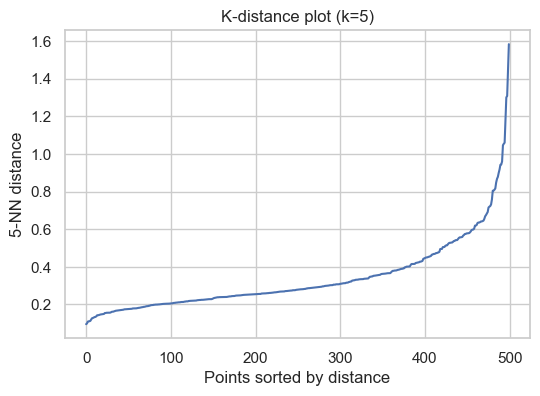

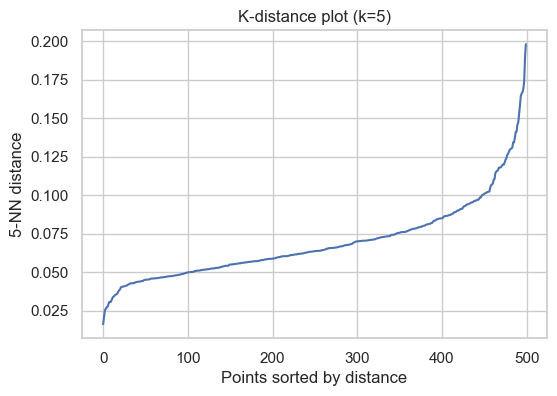

In [7]:
def plot_k_distance(X, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    # distances to k-th nearest neighbor
    k_dist = distances[:, -1]
    k_dist_sorted = np.sort(k_dist)
    plt.figure(figsize=(6,4))
    plt.plot(k_dist_sorted)
    plt.ylabel(f'{k}-NN distance')
    plt.xlabel('Points sorted by distance')
    plt.title(f'K-distance plot (k={k})')
    plt.grid(True)
    plt.show()
    return k_dist_sorted

# blobs
kdist_blobs = plot_k_distance(X1, k=5)
# moons
kdist_moons = plot_k_distance(X2, k=5)

### 2.3.1 Fit DBSCAN with chosen eps and visualize clusters
Choose eps by inspecting the k-distance plots (a reasonable eps near the knee). We'll try eps ~ 0.7 for blobs and eps ~ 0.15 for moons as starting points.

DBSCAN blobs clusters (including -1 noise): [-1, 0, 1, 2, 3]


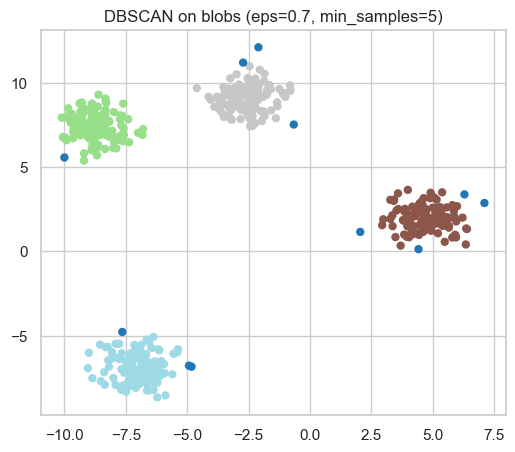

DBSCAN moons clusters (including -1 noise): [-1, 0, 1]


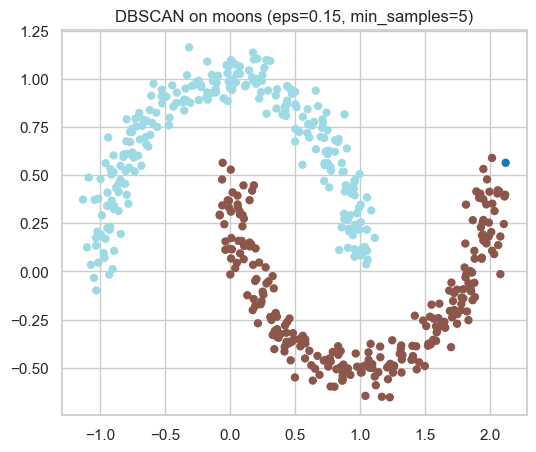

In [8]:
# DBSCAN on blobs
db1 = DBSCAN(eps=0.7, min_samples=5).fit(X1)
labels_db1 = db1.labels_
unique1 = set(labels_db1)
print('DBSCAN blobs clusters (including -1 noise):', sorted(list(unique1)))

plt.figure(figsize=(6,5))
plt.scatter(X1[:,0], X1[:,1], c=labels_db1, cmap='tab20', s=25)
plt.title('DBSCAN on blobs (eps=0.7, min_samples=5)')
plt.show()

# DBSCAN on moons
db2 = DBSCAN(eps=0.15, min_samples=5).fit(X2)
labels_db2 = db2.labels_
unique2 = set(labels_db2)
print('DBSCAN moons clusters (including -1 noise):', sorted(list(unique2)))

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=labels_db2, cmap='tab20', s=25)
plt.title('DBSCAN on moons (eps=0.15, min_samples=5)')
plt.show()

## 3. Observations
- Compare KMeans, GMM, and DBSCAN on both datasets.
- Which algorithm worked best for moons and why?
- Effects of eps being too small or too large in DBSCAN.

### Sample Conclusions (to customize if needed)
- **Blobs dataset:** K-Means and GMM both recover the four clusters well. K-Means is efficient and effective because clusters are roughly spherical and well-separated. GMM adds flexibility in cluster covariance modeling.
- **Moons dataset:** K-Means struggles because clusters are non-convex; GMM can do better if components capture the curved shapes, but DBSCAN works well here because it can discover arbitrarily-shaped clusters based on density.
- **DBSCAN eps sensitivity:** If `eps` is too small, many points become noise (under-clustering). If `eps` is too large, clusters may merge (over-clustering). The k-distance plot helps choose eps near the knee point.
